In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
df = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")

In [3]:
# df.head() returns the first 5 rows of data. df.tail() will return the last 5 rows. 
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [4]:
# Summarize the statistics of each column
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


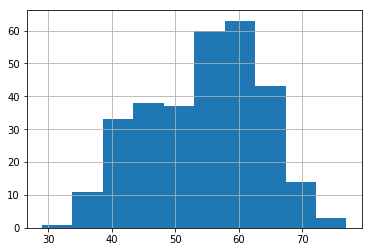

In [5]:
# Plot a histogram of "age"
df["age"].hist()

In [6]:
# Drop the target, trestbps from features. We experimentally deterimine that trestbps is a weakly correlated feature to heart disease.
features = df.drop(["target","trestbps"],axis=1)
labels = df["target"]
print(labels.head())

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


In [7]:
#Normalize the data. Skip this on the first pass.
from sklearn.preprocessing import StandardScaler
std_scl = StandardScaler()
features = std_scl.fit_transform(features)

In [8]:
# Split up the data into training and testing sets. Model will be fit with X_train (features) and y_train (labels)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 4)

In [9]:
# Import two different classifiers to test. Knn and RF. 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
# clf = KNeighborsClassifier(n_neighbors=3)

# Fit the model
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
# Let's look at the feature importances, and which ones are most correlated with successful prediction: 
importances = []
names = list(df)
for i, imp in enumerate(clf.feature_importances_):
    importances.append( (imp, names[i]) )

importances = sorted(importances)
importances.reverse()
for v in importances:
    print("%s: %s" % (v[1],round(v[0],6)))

restecg: 0.132821
cp: 0.123183
slope: 0.122015
ca: 0.11815
exang: 0.117194
age: 0.113932
trestbps: 0.090601
oldpeak: 0.059562
thalach: 0.04506
sex: 0.036906
fbs: 0.0264
chol: 0.014177


In [11]:
# Make predictions on the test feature set
preds = clf.predict(X_test)

In [12]:
# Assess the model in two different ways: confusion matrix and accuracy score.
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(preds,y_test)
acc = accuracy_score(preds,y_test)
print("Confusion matrix is \n %s" % cm)
print("Model accuracy is %s" % acc)

Confusion matrix is 
 [[22  4]
 [ 3 32]]
Model accuracy is 0.8852459016393442
